# Example 4: Securitization
This notebook demonstrates how securitization contributes to the desctruction of total money stocks.

We start by importing required utilities.

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger, Account, AccountSide

## Declaration of agents
Our population of agents in this examples exists of one bank and two different types of private sector agent: one household and one investment fund.

In [2]:
bank = Ledger(residual_account_name="Equity")
household = Ledger(residual_account_name="Equity")
fund = Ledger(residual_account_name="Equity")

bank.make_asset_accounts(['Reserves','Loans','Asset-backed securities'])
bank.make_liability_accounts(['Wholesale Deposits','Retail Deposits'])

fund.make_asset_accounts(['Deposits','Asset-backed securities'])

household.make_asset_accounts(['Deposits'])
household.make_liability_accounts(['Loans'])

We define a function that computes the money stocks according to our defined taxonomy:

In [3]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    # Bank money: bank liabilities that are money
    bank_money = bank.get_balance('Wholesale Deposits')[1]
    bank_money += bank.get_balance('Retail Deposits')[1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks():
    bank_balance_sheet = SVG(bank.draw_balance_sheet("Bank Balance Sheet", width=500))
    fund_balance_sheet = SVG(fund.draw_balance_sheet("Fund Balance Sheet", width=500))
    household_balance_sheet = SVG(household.draw_balance_sheet("Household Balance Sheet", width=500))

    display_svg(bank_balance_sheet, fund_balance_sheet, household_balance_sheet)
    print_money_stocks()

## Start of the example
We initialize the system with a simple set of endowments: the fund owns some money holdings, the household's money holdings come entirely from a bank loan, and the bank's balance sheet only reflects these two contracts.

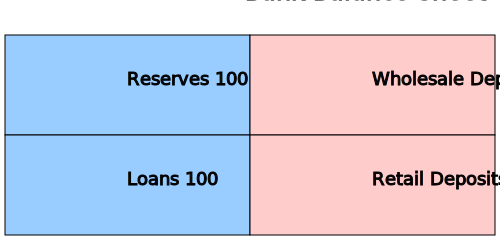

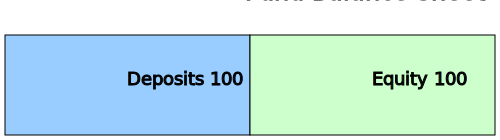

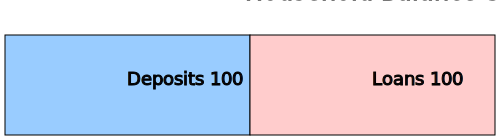

Total (Bank) Money: 200


In [4]:
bank.book(debit=[('Reserves',100),('Loans',100)],credit=[('Wholesale Deposits',100),('Retail Deposits',100)])
fund.book(debit=[('Deposits',100)],credit=[('Equity',100)])
household.book(debit=[('Deposits',100)],credit=[('Loans',100)])
print_balance_sheets_and_money_stocks()

Now the bank securitizes the household's loan, leaving total money stocks unaffected:

In [5]:
bank.book(debit=[('Asset-backed securities',100)],credit=[('Loans',100)])
bank.print_balance_sheet()
print_money_stocks()

Asset accounts:
   Reserves : 100
   Asset-backed securities : 100
Liability accounts:
   Wholesale Deposits : 100
   Retail Deposits : 100
Equity:  0
Total Assets:  200
--
Total (Bank) Money: 200


Now the fund purchases the securitized loans, destroying the money corresponding to the purchase price:

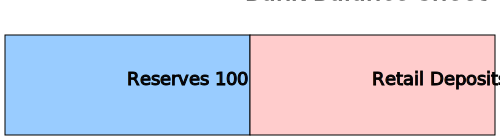

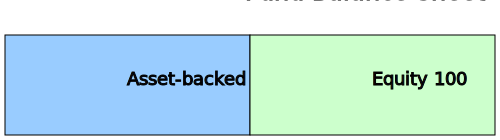

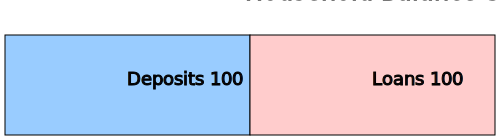

Total (Bank) Money: 100


In [6]:
bank.book(debit=[('Wholesale Deposits',100)],credit=[('Asset-backed securities',100)])
fund.book(debit=[('Asset-backed securities',100)],credit=[('Deposits',100)])
print_balance_sheets_and_money_stocks()